In [1]:
from profiler.core import *

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
def plot_graph(graph, label=False, directed=False):
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    for e in graph.get_edges():
        if label:
            G.add_edge(graph.idx_to_name[e[0]], graph.idx_to_name[e[1]])
        else:
            G.add_edge(e[0], e[1])
    nx.draw(G, with_labels=True)
    plt.draw()
def print_tree(T, node, level=0):
    print("{}[{}]{}".format("--"*level, node, T.idx_to_name[node]))
    for c in T.get_children(node):
        print_tree(T, c, level+1)

In [3]:
pf = Profiler(workers=2, verbose=False, tol=0.01)

In [4]:
#pf.session.load_data(name='flights', src='file', fpath='/Users/zhihan/Documents/bart/data/clean_data/flights.csv', embedtxt=False)
pf.session.load_data(name='hospital', src='file', fpath='data/hospital.csv', embedtxt=False)

INFO:profiler.utility:[0.006212949752807617] Load Data start

INFO:profiler.dataset:inferred types of attributes: {
    "ProviderNumber": "text",
    "HospitalName": "text",
    "Address1": "text",
    "Address2": "categorical",
    "Address3": "categorical",
    "City": "text",
    "State": "categorical",
    "ZipCode": "text",
    "CountyName": "text",
    "PhoneNumber": "text",
    "HospitalType": "text",
    "HospitalOwner": "text",
    "EmergencyService": "categorical",
    "Condition": "text",
    "MeasureCode": "text",
    "MeasureName": "text",
    "Score": "text",
    "Sample": "text",
    "Stateavg": "text"
}
INFO:profiler.dataset:(possible types: numeric, categorical, text)
INFO:profiler.dataset:inferred operators of attributes: {'ProviderNumber': ['equal'], 'HospitalName': ['equal'], 'Address1': ['equal'], 'Address2': ['equal'], 'Address3': ['equal'], 'City': ['equal'], 'State': ['equal'], 'ZipCode': ['equal'], 'CountyName': ['equal'], 'PhoneNumber': ['equal'], 'HospitalTyp

In [5]:
# pf.session.ds.change_dtypes(['ProviderNumber', 'ZipCode', 'PhoneNumber', 'State'], 
#                          ['categorical', 'numeric', 'categorical', 'text'])

In [6]:
# TODO save embedding vectors
# pf.session.load_embedding()

In [7]:
pf.session.load_training_data()
pf.session.learn_structure()


INFO:profiler.utility:[0.0866549015045166] Create Training Data start

INFO:profiler.utility:[0.18378186225891113] Create Training Data execution time: 0.09712696075439453

INFO:profiler.utility:[0.18456101417541504] Recover Moral Graph start

INFO:profiler.utility:[0.19817805290222168] Recover Moral Graph execution time: 0.01361703872680664



In [8]:
s = pf.session.struct_engine

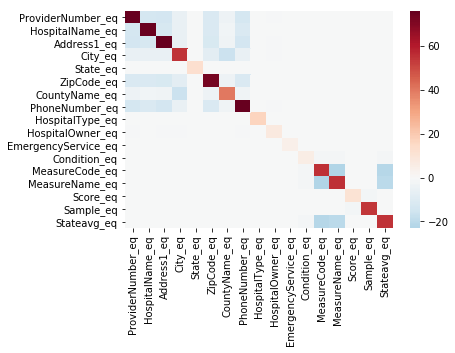

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
snsplt = sns.heatmap(s.inv_cov, cmap=sns.color_palette("RdBu_r", 1000), center=0)

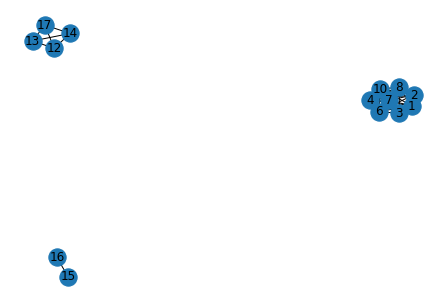

In [10]:
dg = s.construct_moral_graphs(s.inv_cov)
plot_graph(dg)

In [11]:
gs = dg.get_undirected_connected_components()

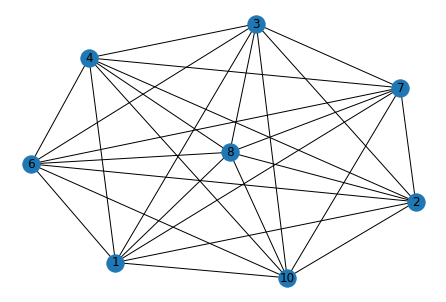

In [12]:
G = gs[0]
plot_graph(G)

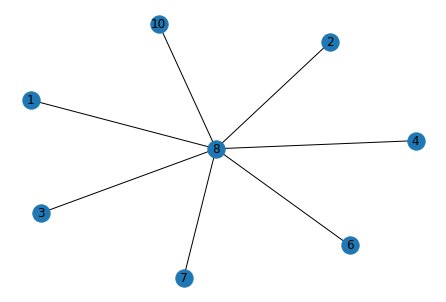

In [20]:
TD = s.tree_decompose(G)
plot_graph(TD, label=False)

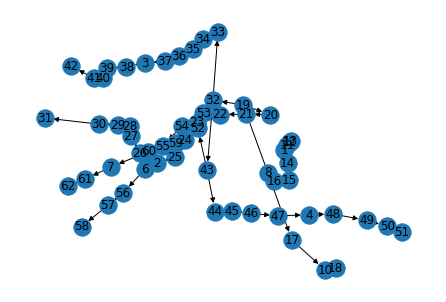

In [14]:
NTD = s.nice_tree_decompose(TD)
plot_graph(NTD, label=False, directed=True)

In [15]:
TD.idx_to_name

{8: frozenset({8}),
 10: frozenset({8, 10}),
 7: frozenset({7, 8, 10}),
 6: frozenset({6, 7, 8, 10}),
 4: frozenset({4, 6, 7, 8, 10}),
 3: frozenset({3, 4, 6, 7, 8, 10}),
 2: frozenset({2, 3, 4, 6, 7, 8, 10}),
 1: frozenset({1, 2, 3, 4, 6, 7, 8, 10})}

In [16]:
print_tree(NTD, NTD.root)

[1]frozenset({1, 2, 3, 4, 6, 7, 8, 10})
--[11]frozenset({2, 3, 4, 6, 7, 8, 10})
----[12]frozenset({3, 4, 6, 7, 8, 10})
------[13]frozenset({4, 6, 7, 8, 10})
--------[14]frozenset({8, 10, 6, 7})
----------[15]frozenset({8, 10, 7})
------------[16]frozenset({8, 10})
--------------[8]frozenset({8})
----------------[17]frozenset({8})
------------------[10]frozenset({8, 10})
--------------------[18]frozenset({10})
----------------[19]frozenset({8})
------------------[20]frozenset({8})
--------------------[21]frozenset({8, 2})
----------------------[22]frozenset({8, 2, 3})
------------------------[23]frozenset({8, 2, 3, 4})
--------------------------[24]frozenset({2, 3, 4, 6, 8})
----------------------------[25]frozenset({2, 3, 4, 6, 7, 8})
------------------------------[2]frozenset({2, 3, 4, 6, 7, 8, 10})
--------------------------------[26]frozenset({3, 4, 6, 7, 8, 10})
----------------------------------[27]frozenset({4, 6, 7, 8, 10})
------------------------------------[28]frozenset({8, 1

In [17]:
# dynamic programming
leaves = NTD.out_degrees.index.values[NTD.out_degrees['degree'] == 0]

In [18]:
t = 24
a = NTD.idx_to_name[t]

In [19]:
NTD.idx_to_name[t]

frozenset({2, 3, 4, 6, 8})